In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import time
from sklearn import metrics
from sklearn_som.som import SOM


IRIS

In [68]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# data (as pandas dataframes) 
iris_vectors = iris.data.features 
iris_classes_kmeans = [0] * 50 + [1] * 50 + [2] * 50
iris_classes_som = [0] * 50 + [1] * 50 + [2] * 50

np.savetxt('iris_vectors.txt', iris_vectors)


In [71]:
start = time.time()
kmeans_iris=KMeans(n_clusters=3, n_init=10).fit(iris_vectors)
end = time.time()
iris_kmeans_predictions = kmeans_iris.labels_
print("Time taken for Kmeans clustering of Iris: ", end-start)
print("Kmeans Iris Score: ", metrics.rand_score(iris_classes_kmeans, kmeans_iris.labels_))
print(kmeans_iris.labels_)
print(iris_classes_kmeans)

Time taken for Kmeans clustering of Iris:  0.048918962478637695
Kmeans Iris Score:  0.8797315436241611
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [60]:
from sklearn import datasets

iris = datasets.load_iris()
iris_vectors = iris.data[:,:2]
iris_classes = iris.target

iris_som = SOM(m=3, n=1, dim=2)
iris_som.fit(iris_vectors)

iris_predictions_kmeans = iris_som.predict(iris_vectors)

print(iris_predictions_kmeans)
print(iris_classes)
print("Kmeans BME Score: ", metrics.rand_score(iris_classes, iris_predictions_kmeans))


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 2 0 2 2 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 2 1 0 0 1 1 1 0 1 2 1 1 1 0 2 1 0 1 0 0 0 0 2 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Kmeans BME Score:  0.7645637583892617


In [61]:
bme_vectors_test = np.loadtxt('BME_TEST.txt')[:,1:]
bme_vectors_train = np.loadtxt('BME_TRAIN.txt')[:,1:]
bme_vectors = np.concatenate((bme_vectors_train, bme_vectors_test))
print(bme_vectors.shape)

bme_classes = [0] * 50 + [1] * 50 + [2] * 50 + [0] *10 + [1] * 10 + [2] * 10
print(bme_classes)

(180, 128)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [62]:
start = time.time()
kmeans_bme=KMeans(n_clusters=3, n_init=10).fit(bme_vectors)
end = time.time()
print("Time taken for Kmeans clustering of BME: ", end-start)

bme_predictions_kmeans = kmeans_bme.labels_
print(kmeans_bme.labels_)
print(bme_classes)
print("Kmeans BME Score: ", metrics.rand_score(bme_classes, kmeans_bme.labels_))

Time taken for Kmeans clustering of BME:  0.05435943603515625
[1 1 1 0 1 1 1 1 2 0 0 2 2 2 0 0 0 2 2 0 1 1 2 1 2 0 1 1 1 1 1 2 2 0 1 1 2
 0 0 1 0 1 1 1 1 2 1 2 2 0 0 1 0 0 2 1 0 0 0 1 2 0 2 0 2 1 0 2 1 0 1 1 2 0
 1 2 1 1 1 0 2 0 0 0 2 2 0 2 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 2 2 0 0 2 0 2 0
 0 2 2 2 2 0 2 2 0 0 2 0 0 0 0 2 2 0 2 1 0 1 1 0 0 2 0 2 1 0 0 1 0 1 0 0 1
 2 1 1 2 0 0 1 2 0 1 1 1 0 1 1 0 0 0 1 1 2 1 1 1 1 1 0 0 1 1 1 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Kmeans BME Score:  0.5625698324

In [63]:
bme_som = SOM(m=3, n=1, dim=128)
bme_som.fit(bme_vectors)
bme_predictions = bme_som.predict(bme_vectors)
print(bme_predictions)
print(bme_classes)
print("Kmeans BME Score: ", metrics.rand_score(bme_classes, bme_predictions))

[2 2 2 0 2 2 2 2 0 0 0 0 0 1 0 0 0 1 1 0 2 2 0 2 0 0 2 2 2 2 2 0 0 0 2 2 0
 0 0 2 0 2 2 2 2 0 2 0 1 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 2 0 0
 2 0 2 2 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 2 0 0 2 0 2 0 1 2
 0 2 2 0 0 0 2 0 0 2 2 2 0 2 2 0 0 0 2 2 0 2 2 2 2 2 0 0 2 2 2 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Kmeans BME Score:  0.5143389199255121


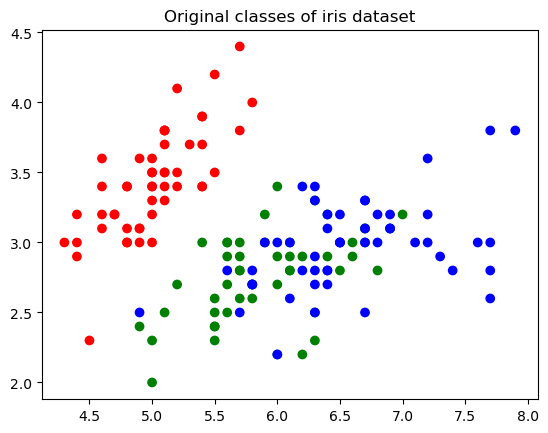

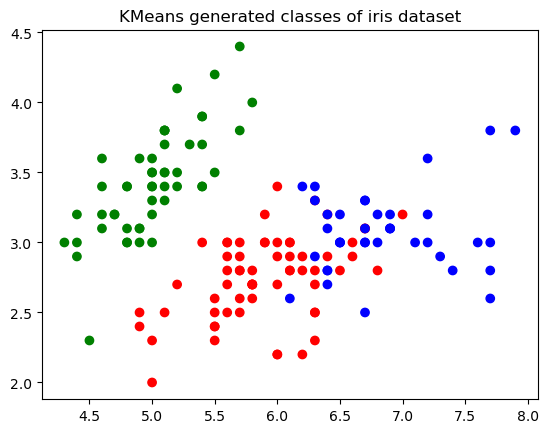

In [64]:
colors = ['r', 'g', 'b']

plt.scatter(iris_vectors[:,0], iris_vectors[:,1], c=iris_classes, cmap=ListedColormap(colors))
plt.title("Original classes of iris dataset")
plt.show()

plt.scatter(iris_vectors[:,0], iris_vectors[:,1], c=iris_kmeans_predictions, cmap=ListedColormap(colors))
plt.title("KMeans generated classes of iris dataset")
plt.show()

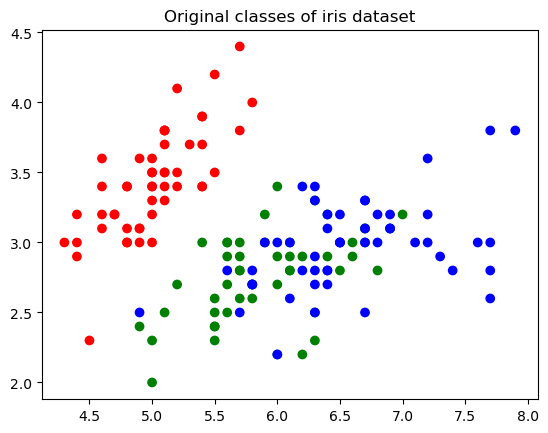

<function matplotlib.pyplot.show(close=None, block=None)>

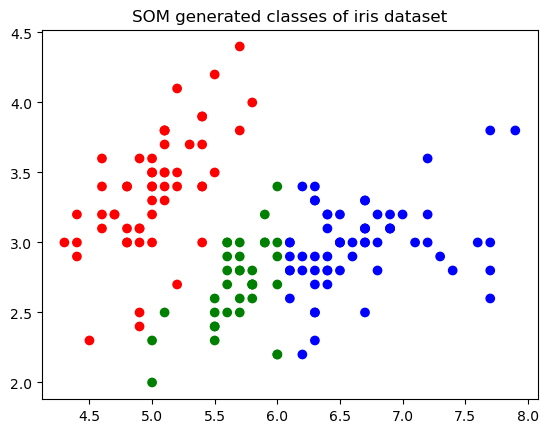

In [65]:
colors = ['r', 'g', 'b']

plt.scatter(iris_vectors[:,0], iris_vectors[:,1], c=iris_classes, cmap=ListedColormap(colors))
plt.title("Original classes of iris dataset")
plt.show()

plt.scatter(iris_vectors[:,0], iris_vectors[:,1], c=iris_predictions, cmap=ListedColormap(colors))
plt.title("SOM generated classes of iris dataset")
plt.show

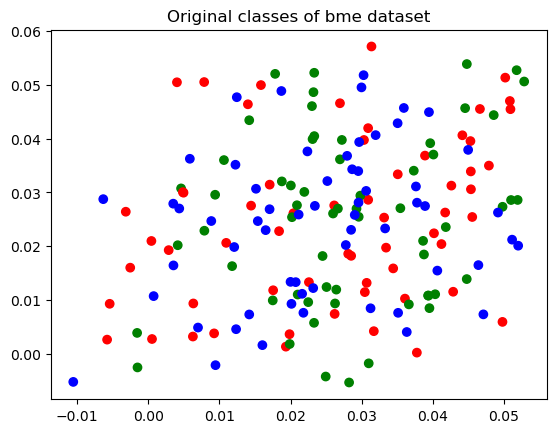

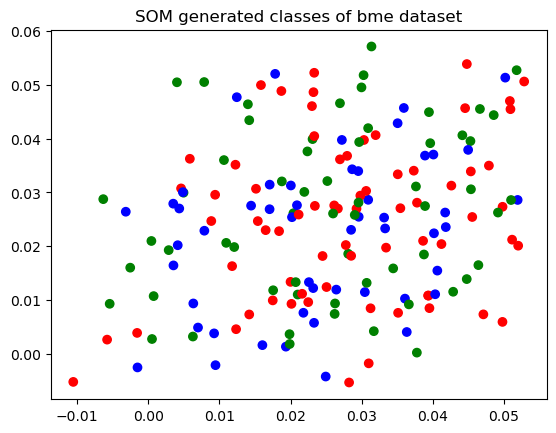

In [66]:
colors = ['r', 'g', 'b']

plt.scatter(bme_vectors[:,0], bme_vectors[:,1], c=bme_classes, cmap=ListedColormap(colors))
plt.title("Original classes of bme dataset")
plt.show()

plt.scatter(bme_vectors[:,0], bme_vectors[:,1], c=bme_predictions_kmeans, cmap=ListedColormap(colors))
plt.title("SOM generated classes of bme dataset")
plt.show()

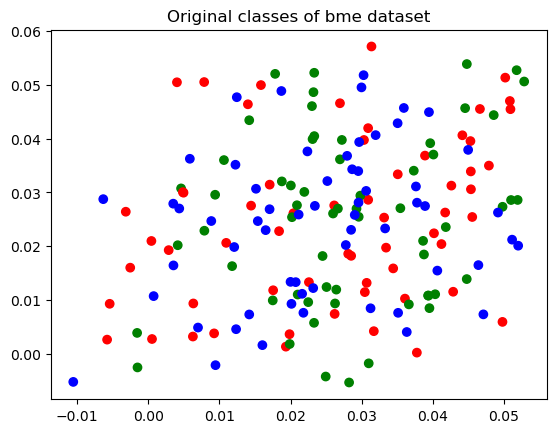

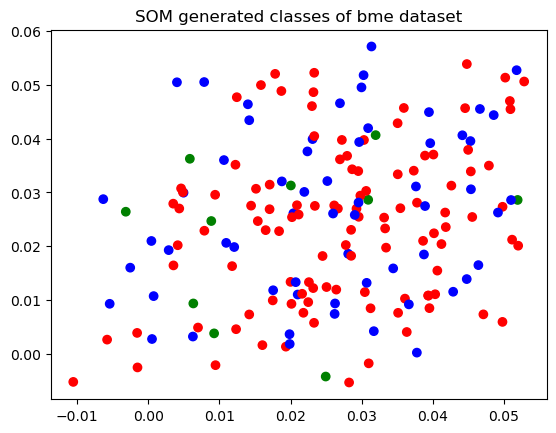

In [67]:
colors = ['r', 'g', 'b']

plt.scatter(bme_vectors[:,0], bme_vectors[:,1], c=bme_classes, cmap=ListedColormap(colors))
plt.title("Original classes of bme dataset")
plt.show()

plt.scatter(bme_vectors[:,0], bme_vectors[:,1], c=bme_predictions, cmap=ListedColormap(colors))
plt.title("SOM generated classes of bme dataset")
plt.show()